In [62]:
import os 
import sys
import csv
import sqlite3
import glob
import itertools
import re
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.stem import PorterStemmer
from collections import OrderedDict
pd.options.display.max_colwidth = 200 # Adjust the display length 

In [45]:
j_file = r"C:/Users/MR/OneDrive - Seedergy/MAEN/Code/Projects/job/job_ads_small.xlsx"
xl_file = pd.ExcelFile(j_file)
df_raw = pd.read_excel(j_file, sheet_name=0, encoding='utf-8')

In [46]:
df_j = df_raw.copy()

In [47]:
# make all dataframe lower case
df_j = df_j.apply(lambda x: x.astype(str))

# Create an all column capturing all texts
df_j['all'] = df_j[df_j.columns[1:]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)


In [54]:
ps = PorterStemmer()
def preprocess1(data):
    reviews_tokens = []
    for review in data:
        reviews = review.lower() #Convert to lower-case words
        raw_word_tokens = re.findall(r'(?:\w+)', review,flags = re.UNICODE) #remove pontuaction
        word_tokens = [w for w in raw_word_tokens if not w in stop_words] # do not add stop words
        reviews_tokens.append(word_tokens)
        reviews = list(itertools.chain(*reviews_tokens))
        text_reviews = " ".join(reviews)    
        root_words = ps.stem(text_reviews)
    return root_words #reviews #raw_word_tokens #text_reviews #word_tokens #return all tokens


In [55]:
# Create empty columns
df_j['all_prep1'] = ''

# loop over each row and apply the prepreation function per row
for index, row in df_j.iterrows():
    row['all_prep1'] = list(map(str,row['all'].split(',')))
    row['all_prep1'] = preprocess1(row['all_prep1'])   

In [61]:
df_j['all'][0]

'Senior Resarch Analyst, Oil,We are looking for a Senior Research Analyst to join our Commodity Analytics Oil Markets team in Houston. Our Oils research team is a highly respected group of analysts producing market-leading research on the entire oil supply chain from crude supply through refining and fuels marketing to end-use demand. Together we work with our clients delivering an excellent service every day as we support them in their planning and decision-making processes.\n\nAbout you and how you can excel in this role\n\nYou are curious and passionate about oil and energy industry and you have a desire to develop an in-depth understanding of the sector. You have an analytical mindset and an eye for detail, which has been proven in your academic and work experience to date. You are comfortable collecting and interpreting data, articulating your findings in a clear and insightful manner. You also have a flair for writing and communication.\n\nYour long-term aspiration is to be an in

In [60]:
df_j['all_prep1'][0]

'senior resarch analyst oil we looking senior research analyst join commodity analytics oil markets team houston our oils research team highly respected group analysts producing market leading research entire oil supply chain crude supply refining fuels marketing end use demand together work clients delivering excellent service every day support planning decision making processes about excel role you curious passionate oil energy industry desire develop depth understanding sector you analytical mindset eye detail proven academic work experience date you comfortable collecting interpreting data articulating findings clear insightful manner you also flair writing communication your long term aspiration influential subject matter expert setting industry agenda you looking role build existing knowledge learn others collaborative commercial client centric environment you also enjoy sharing learnt others if looking build network clients contacts industry role enable use effective client enga

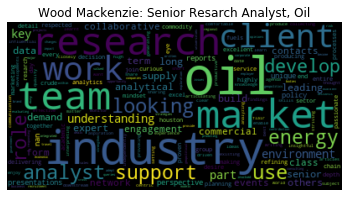

In [57]:
row_num = 0
text = list(map(str,df_j['all_prep1'][row_num].split(',')))
plot_title = df_j['employer'][row_num]+": "+df_j['title'][row_num]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text_reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(plot_title)
plt.show()

In [134]:
word_string = ''.join([str(a) for a in text]) # convert to string
word_list = word_string.split() # create a word list

word_freq = {}
for raw_word in word_list:
    
    if raw_word not in word_freq:
        word_freq[raw_word] = 0 
    word_freq[raw_word] += 1

In [139]:
{k: v for k, v in sorted(word_freq.items(), key=lambda item: item[1], reverse=True)}

{'you': 14,
 'oil': 8,
 'industry': 7,
 'research': 5,
 'team': 5,
 'work': 5,
 'also': 4,
 'looking': 3,
 'markets': 3,
 'use': 3,
 'support': 3,
 'role': 3,
 'energy': 3,
 'develop': 3,
 'understanding': 3,
 'client': 3,
 'environment': 3,
 'part': 3,
 'key': 3,
 'senior': 2,
 'analyst': 2,
 'market': 2,
 'leading': 2,
 'supply': 2,
 'demand': 2,
 'clients': 2,
 'analytical': 2,
 'data': 2,
 'your': 2,
 'long': 2,
 'term': 2,
 'build': 2,
 'others': 2,
 'collaborative': 2,
 'commercial': 2,
 'network': 2,
 'contacts': 2,
 'class': 2,
 'as': 2,
 'events': 2,
 'form': 2,
 'presentations': 2,
 'reports': 2,
 'unique': 2,
 'perspective': 2,
 'policy': 2,
 'nan': 2,
 'resarch': 1,
 'we': 1,
 'join': 1,
 'commodity': 1,
 'analytics': 1,
 'houston': 1,
 'our': 1,
 'oils': 1,
 'highly': 1,
 'respected': 1,
 'group': 1,
 'analysts': 1,
 'producing': 1,
 'entire': 1,
 'chain': 1,
 'crude': 1,
 'refining': 1,
 'fuels': 1,
 'marketing': 1,
 'end': 1,
 'together': 1,
 'delivering': 1,
 'excellent

In [135]:
wordfreq

{'senior': 2,
 'resarch': 1,
 'analyst': 2,
 'oil': 8,
 'we': 1,
 'looking': 3,
 'research': 5,
 'join': 1,
 'commodity': 1,
 'analytics': 1,
 'markets': 3,
 'team': 5,
 'houston': 1,
 'our': 1,
 'oils': 1,
 'highly': 1,
 'respected': 1,
 'group': 1,
 'analysts': 1,
 'producing': 1,
 'market': 2,
 'leading': 2,
 'entire': 1,
 'supply': 2,
 'chain': 1,
 'crude': 1,
 'refining': 1,
 'fuels': 1,
 'marketing': 1,
 'end': 1,
 'use': 3,
 'demand': 2,
 'together': 1,
 'work': 5,
 'clients': 2,
 'delivering': 1,
 'excellent': 1,
 'service': 1,
 'every': 1,
 'day': 1,
 'support': 3,
 'planning': 1,
 'decision': 1,
 'making': 1,
 'processes': 1,
 'about': 1,
 'excel': 1,
 'role': 3,
 'you': 14,
 'curious': 1,
 'passionate': 1,
 'energy': 3,
 'industry': 7,
 'desire': 1,
 'develop': 3,
 'depth': 1,
 'understanding': 3,
 'sector': 1,
 'analytical': 2,
 'mindset': 1,
 'eye': 1,
 'detail': 1,
 'proven': 1,
 'academic': 1,
 'experience': 1,
 'date': 1,
 'comfortable': 1,
 'collecting': 1,
 'interpret

In [122]:
word_string = ''.join([str(a) for a in text]) # convert to string
word_list = word_string.split() # create a word list

# Get frequenc of each word
word_freq = []
for w in word_list:
    word_freq.append(word_list.count(w))
    
# Combine frequency with actual words
word_lst = list(zip(word_list, word_freq))

In [128]:
word_lst

"[('senior', 2), ('resarch', 1), ('analyst', 2), ('oil', 8), ('we', 1), ('looking', 3), ('senior', 2), ('research', 5), ('analyst', 2), ('join', 1), ('commodity', 1), ('analytics', 1), ('oil', 8), ('markets', 3), ('team', 5), ('houston', 1), ('our', 1), ('oils', 1), ('research', 5), ('team', 5), ('highly', 1), ('respected', 1), ('group', 1), ('analysts', 1), ('producing', 1), ('market', 2), ('leading', 2), ('research', 5), ('entire', 1), ('oil', 8), ('supply', 2), ('chain', 1), ('crude', 1), ('supply', 2), ('refining', 1), ('fuels', 1), ('marketing', 1), ('end', 1), ('use', 3), ('demand', 2), ('together', 1), ('work', 5), ('clients', 2), ('delivering', 1), ('excellent', 1), ('service', 1), ('every', 1), ('day', 1), ('support', 3), ('planning', 1), ('decision', 1), ('making', 1), ('processes', 1), ('about', 1), ('excel', 1), ('role', 3), ('you', 14), ('curious', 1), ('passionate', 1), ('oil', 8), ('energy', 3), ('industry', 7), ('desire', 1), ('develop', 3), ('depth', 1), ('understandin

In [124]:
words = re.findall('\w+', open('1976.03.txt').read().lower())
print collections.Counter(words)

In [125]:
word_freq_dict = {}
Convert(word_tuple, word_freq_dict)

{'senior': [2, 2],
 'resarch': [1],
 'analyst': [2, 2],
 'oil': [8, 8, 8, 8, 8, 8, 8, 8],
 'we': [1],
 'looking': [3, 3, 3],
 'research': [5, 5, 5, 5, 5],
 'join': [1],
 'commodity': [1],
 'analytics': [1],
 'markets': [3, 3, 3],
 'team': [5, 5, 5, 5, 5],
 'houston': [1],
 'our': [1],
 'oils': [1],
 'highly': [1],
 'respected': [1],
 'group': [1],
 'analysts': [1],
 'producing': [1],
 'market': [2, 2],
 'leading': [2, 2],
 'entire': [1],
 'supply': [2, 2],
 'chain': [1],
 'crude': [1],
 'refining': [1],
 'fuels': [1],
 'marketing': [1],
 'end': [1],
 'use': [3, 3, 3],
 'demand': [2, 2],
 'together': [1],
 'work': [5, 5, 5, 5, 5],
 'clients': [2, 2],
 'delivering': [1],
 'excellent': [1],
 'service': [1],
 'every': [1],
 'day': [1],
 'support': [3, 3, 3],
 'planning': [1],
 'decision': [1],
 'making': [1],
 'processes': [1],
 'about': [1],
 'excel': [1],
 'role': [3, 3, 3],
 'you': [14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14],
 'curious': [1],
 'passionate': [1],
 'energy': 

In [ ]:
def listit(t):
    return list(map(listit, t)) if isinstance(t, (list, tuple)) else t


In [83]:
word_string = ''.join([str(a) for a in text])
word_list = word_string.split()
word_freq = []
for w in word_list:
    word_freq.append(word_list.count(w))

lst = str(list(zip(word_list, word_freq)))
sorted_lst = sorted ([lst], key= lambda x: x[1])
    
# print("Frequencies\n" + str(word_freq) + "\n")
# print(sort("Pairs\n" + str(list(zip(word_list, word_freq)))))

In [89]:
lst[:50]

"[('senior', 2), ('resarch', 1), ('analyst', 2), ('"

In [94]:
# from operator import itemgetter
# sorted(lst,key=itemgetter(all))

sorted(lst, key=operator.itemgetter(1,2))

NameError: name 'operator' is not defined

In [85]:
results = []
for line in :
    lst = line.rstrip().split(",")
    lst = tuple(lst)
    results.append(lst)

return sorted(s, key=operator.itemgetter(1,2))

"[('senior', 2), ('resarch', 1), ('analyst', 2), ('oil', 8), ('we', 1), ('looking', 3), ('senior', 2), ('research', 5), ('analyst', 2), ('join', 1), ('commodity', 1), ('analytics', 1), ('oil', 8), ('markets', 3), ('team', 5), ('houston', 1), ('our', 1), ('oils', 1), ('research', 5), ('team', 5), ('highly', 1), ('respected', 1), ('group', 1), ('analysts', 1), ('producing', 1), ('market', 2), ('leading', 2), ('research', 5), ('entire', 1), ('oil', 8), ('supply', 2), ('chain', 1), ('crude', 1), ('supply', 2), ('refining', 1), ('fuels', 1), ('marketing', 1), ('end', 1), ('use', 3), ('demand', 2), ('together', 1), ('work', 5), ('clients', 2), ('delivering', 1), ('excellent', 1), ('service', 1), ('every', 1), ('day', 1), ('support', 3), ('planning', 1), ('decision', 1), ('making', 1), ('processes', 1), ('about', 1), ('excel', 1), ('role', 3), ('you', 14), ('curious', 1), ('passionate', 1), ('oil', 8), ('energy', 3), ('industry', 7), ('desire', 1), ('develop', 3), ('depth', 1), ('understandin

In [84]:
sorted_lst

["[('senior', 2), ('resarch', 1), ('analyst', 2), ('oil', 8), ('we', 1), ('looking', 3), ('senior', 2), ('research', 5), ('analyst', 2), ('join', 1), ('commodity', 1), ('analytics', 1), ('oil', 8), ('markets', 3), ('team', 5), ('houston', 1), ('our', 1), ('oils', 1), ('research', 5), ('team', 5), ('highly', 1), ('respected', 1), ('group', 1), ('analysts', 1), ('producing', 1), ('market', 2), ('leading', 2), ('research', 5), ('entire', 1), ('oil', 8), ('supply', 2), ('chain', 1), ('crude', 1), ('supply', 2), ('refining', 1), ('fuels', 1), ('marketing', 1), ('end', 1), ('use', 3), ('demand', 2), ('together', 1), ('work', 5), ('clients', 2), ('delivering', 1), ('excellent', 1), ('service', 1), ('every', 1), ('day', 1), ('support', 3), ('planning', 1), ('decision', 1), ('making', 1), ('processes', 1), ('about', 1), ('excel', 1), ('role', 3), ('you', 14), ('curious', 1), ('passionate', 1), ('oil', 8), ('energy', 3), ('industry', 7), ('desire', 1), ('develop', 3), ('depth', 1), ('understandi

In [40]:
# Pick job ad of interest
row_num = 0

# Convert specific cell to a list
text = list(map(str,df_j['all'][row_num].split(',')))

# Preprocess and make ready for word cloud
tokenized_text = preprocess(text) #apply the preprocess step
reviews = list(itertools.chain(*tokenized_text))
text_reviews = " ".join(reviews)    

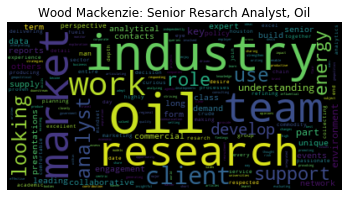

In [41]:
plot_title = df_j['employer'][row_num]+": "+df_j['title'][row_num]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text_reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(plot_title)
plt.show()

In [ ]:
def get_first_title(title):
    # keep "co-founder, co-ceo, etc"
    title = re.sub(r"[Cc]o[\-\ ]","", title)
    split_titles = re.split(r"\,|\-|\||\&|\:|\/|and", title)
    return split_titles[0].strip()


def get_title_features(title):
    features = {}
    word_tokens = nltk.word_tokenize(title)
    filtered_words = [w for w in word_tokens if not w in stop_words] 
    for word in filtered_words:
        features['contains({})'.format(word.lower())] = True
    if len(filtered_words) > 0:
        first_key = 'first({})'.format(filtered_words[0].lower())
        last_key = 'last({})'.format(filtered_words[-1].lower())
        features[first_key] = True
        features[last_key] = True
    return features

In [ ]:
raw_job_titles = [
{
"title": "Business Development",
"responsibility": "Strategy",
"department": "Business Development"
},
{
"title": "Inside Sales Consultant",
"responsibility": "Execution",
"department": "Sales"
},

]

In [ ]:
## build feature sets
# Responsibilities
responsibilities_features = [
    (
         get_title_features(job_title["title"]),
         job_title["responsibility"]
    )
    for job_title in raw_job_titles
    if job_title["responsibility"] is not None
]

# Departments
departments_features = [
    (
         get_title_features(job_title["title"]),
         job_title["department"]
    )
    for job_title in raw_job_titles
    if job_title["department"] is not None
]

In [ ]:
responsibilities_features

In [ ]:
## Train classifier
# Responsibilities
r_size = int(len(responsibilities_features) * 0.5)
r_train_set = responsibilities_features[r_size:]
r_test_set = responsibilities_features[:r_size]
responsibilities_classifier = nltk.NaiveBayesClassifier.train(
    r_train_set
)
print("Responsibility classification accuracy: {}".format(
    nltk.classify.accuracy(
        responsibilities_classifier,
        r_test_set
    )
))

In [ ]:
# Departments
d_size = int(len(departments_features) * 0.5)
d_train_set = departments_features[d_size:]
d_test_set = departments_features[:d_size]
departments_classifier = nltk.NaiveBayesClassifier.train(
    d_train_set
)
print("Department classification accuracy: {}".format(
    nltk.classify.accuracy(
        departments_classifier,
        d_test_set
    )
))


In [ ]:
## Test Classifier
title = "Director of Communications"
responsibility = responsibilities_classifier.classify(
    get_title_features(title)
)
department = departments_classifier.classify(
    get_title_features(title)
)
print("Job title: '{}'".format(title))
print("Responsibility: '{}'".format(responsibility))
print("Department: '{}'".format(department))
